# Assignment
**Rationale** This dataset includes all TripAdvisor reviews written in 2015 (through part of 2016) for high review volume Vegas resorts and was collected as part of a large web crawl of over 50 Million online reviews at over 428k worldwide hotels. 

* [Dataset](https://drive.google.com/drive/folders/1nUIOHqvOoF5EkST8u_pMcL7gvKtCy0La?usp=sharing)
    * `vegas2015reviews.csv` contains the reviews 
    * `vegas_venue_info.csv` contains a list of venues in Vegas
    * Note that `gd` is the venue ID in both datasets

**Instructions: Please open this notebook in google colab and once you have completed the assignment, press share on the top right. Make available for anyone with a link. Then send the link to: y.bart@northeastern.edu and govergoor@saunders.rit.edu. Briefly describe how much time it took and what difficulties you encountered.**

# Problem 1: Sentiment Analysis 

## First, let's get to know the dataset.

1. Read in the vegas reviews dataset (call this `df`)
1. Convert any columns that look like dates into Pandas datetime columns.
1. Read in the venue info dataset and merge it with the reviews dataset. (call the resulting dataframe `df`, i.e. write over the old `df`)

Answer the following for the resulting merged dataframe, `df`:
1. How many reviews are there?
1. How many unique hotels are there? Note `gd` is the ID variable for hotels on TripAdvisor.
1. What are the unique types of travel categories?
1. Plot a histogram of the review ratings. How would you describe the overall review ratings on TripAdvisor for Vegas resorts?

## Sentiment 

Use `TextBlob` library to compute the polarity and subjectivity of every review.

1. Compare the histogram of review polarity with review ratings. How are they different? What might you conclude based on this difference about how people rate and how people write?
1. To what degree are polarity and subjectivity correlated with ratings?
1. Use a groupby + corr() statement to calculate the correlation between review ratings and polarity by travel category. In which categories are review polarity most and least correlated with ratings? Any explanation for this relationship?

In [18]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
!dir

 Volume in drive C is OS
 Volume Serial Number is DE99-EF68

 Directory of c:\Users\durga\Documents\Python Scripts\Projects\NLP Project

02/15/2022  09:23 PM    <DIR>          .
02/15/2022  01:19 PM    <DIR>          ..
02/15/2022  09:23 PM                 0 test.ipynb
02/15/2022  01:41 PM        52,076,183 vegas2015reviews.csv
02/15/2022  01:41 PM           307,389 vegas_vinfo.csv
02/15/2022  06:19 PM            29,913 Yelp task (LV resorts).ipynb
               4 File(s)     52,413,485 bytes
               2 Dir(s)  406,179,938,304 bytes free


In [21]:
# Reading the review file from the shared google drive link
review_url = 'https://drive.google.com/file/d/1AIn4VWk7UKHpw6oGgB3KGNVlOY1gsXMs/view?usp=sharing'
review_path = 'https://drive.google.com/uc?export=download&id='+review_url.split('/')[-2]
df = pd.read_csv(review_path)
df.head()

,Unnamed: 0,gd,helpful_num,location,mgrRspnDummy,mgr_res_date,mrtext,ratingDate,review_id,reviewrating,reviewtext,reviewtitle,stay_month,stay_year,travel_category,username
0,15044,g45963-d1123368,NaN,"Walnut Creek, California",0,NaN,NaN,2015-07-01,284818340,5,An excellent property! The rooms are very nice...,“At the top of its game”,6.0,2015.0,business,cadby
1,15045,g45963-d1123368,NaN,"Maidstone, United Kingdom",0,NaN,NaN,2015-07-01,284776986,5,My first visit to Las Vegas and WOW!! Whilst a...,“ wow!! ”,9.0,2014.0,couple,Sonia H
2,15046,g45963-d1123368,NaN,Brussels,0,NaN,NaN,2015-06-30,284187374,5,Some of the most beautiful hotel rooms in the ...,“ Mass market but luxery hotel at north end of...,6.0,2015.0,couple,Globaliser
3,15047,g45963-d1123368,NaN,"Colchester, United Kingdom",0,NaN,NaN,2015-06-13,279887884,5,"This Hotel is exceptional, its beautifully set...",“ Highlight of Vegas ”,5.0,2015.0,couple,Sharcoates
4,15058,g45963-d1123368,NaN,"Denver, Colorado, United States",0,NaN,NaN,2015-06-13,279841140,5,"My husband and I stayed here during a trip,to ...","“ Beautiful hotel, great location ”",6.0,2015.0,couple,Kimberly A


In [23]:
# Reading the Venue Info file from Google Drive shared location
info_url = 'https://drive.google.com/file/d/18gwz_VmCJpD2d48LoovGNwAY8T_-eTeP/view?usp=sharing'
info_path = 'https://drive.google.com/uc?export=download&id='+info_url.split('/')[-2]
venue_df = pd.read_csv(path)
venue_df.head()

,Unnamed: 0,ranking,rating_vol,rdetails,lnglat,rsubrating,vtype,amenities,details,v_name,rating_cat,gd
0,0,"[10, 33]",60.0,NaN,"[-115.06332, 36.1191]",{},Hotel_Review,{'Services': 'Free Parking Banquet Room Self-S...,"{'Number of rooms:': '398 ', 'Address:': '3890...",Las Vegas RV Resort,4.0,g45963-d3600552
1,1,"[209, 267]",63.0,NaN,"[-115.08308, 36.127922]",{},Hotel_Review,{'Things to do': 'Pool Fitness Center with Gym...,"{'Address:': '4240 Boulder Hwy, Las Vegas, NV ...",Crossland Economy Studios - Las Vegas - Boulde...,2.5,g45963-d97850
2,2,"[197, 267]",100.0,NaN,"[-115.19604, 36.20166]",{},Hotel_Review,"{'Room types': 'Non-Smoking Rooms ', 'Services...","{'Address:': '2400 N Rancho Dr, Las Vegas, NV ...",Fiesta Rancho Hotel and Casino,2.5,g45963-d121329
3,3,"[228, 267]",27.0,NaN,"[-115.19868, 36.201473]",{},Hotel_Review,"{'Things to do': 'Pool ', 'About the property'...",{'Also Known As:': 'Budget Suites Of America N...,Budget Suites of America North Rancho Drive,1.5,g45963-d91750
4,4,"[1, 33]",271.0,NaN,"[-115.1785, 36.040703]",{},Hotel_Review,{'Services': 'Self-Serve Laundry Free Parking ...,{'Also Known As:': 'Oasis Las Vegas Rv Hotel L...,Oasis Las Vegas RV Resort,4.5,g45963-d226809


In [24]:
df.columns

Index(['Unnamed: 0', 'gd', 'helpful_num', 'location', 'mgrRspnDummy',
       'mgr_res_date', 'mrtext', 'ratingDate', 'review_id', 'reviewrating',
       'reviewtext', 'reviewtitle', 'stay_month', 'stay_year',
       'travel_category', 'username'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46644 entries, 0 to 46643
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       46644 non-null  int64  
 1   gd               46644 non-null  object 
 2   helpful_num      23576 non-null  float64
 3   location         39772 non-null  object 
 4   mgrRspnDummy     46644 non-null  int64  
 5   mgr_res_date     24957 non-null  object 
 6   mrtext           44220 non-null  object 
 7   ratingDate       46644 non-null  object 
 8   review_id        46644 non-null  int64  
 9   reviewrating     46644 non-null  int64  
 10  reviewtext       46644 non-null  object 
 11  reviewtitle      46644 non-null  object 
 12  stay_month       44649 non-null  float64
 13  stay_year        44649 non-null  float64
 14  travel_category  44649 non-null  object 
 15  username         45693 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 5.7+ MB


In [29]:
# Viewing the date columns from the review data
df[['mgr_res_date','ratingDate']]

,mgr_res_date,ratingDate
0,NaT,2015-07-01
1,NaT,2015-07-01
2,NaT,2015-06-30
3,NaT,2015-06-13
4,NaT,2015-06-13
...,...,...
46639,2015-03-16,2015-03-15
46640,2015-03-16,2015-03-15
46641,2015-03-19,2015-03-15
46642,2015-03-16,2015-03-15


In [30]:
# Converting dates in reviews dataframe
df['mgr_res_date'] = pd.to_datetime(df.mgr_res_date)
df.ratingDate = pd.to_datetime(df.ratingDate)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46644 entries, 0 to 46643
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       46644 non-null  int64         
 1   gd               46644 non-null  object        
 2   helpful_num      23576 non-null  float64       
 3   location         39772 non-null  object        
 4   mgrRspnDummy     46644 non-null  int64         
 5   mgr_res_date     24957 non-null  datetime64[ns]
 6   mrtext           44220 non-null  object        
 7   ratingDate       46644 non-null  datetime64[ns]
 8   review_id        46644 non-null  int64         
 9   reviewrating     46644 non-null  int64         
 10  reviewtext       46644 non-null  object        
 11  reviewtitle      46644 non-null  object        
 12  stay_month       44649 non-null  float64       
 13  stay_year        44649 non-null  float64       
 14  travel_category  44649 non-null  objec

In [32]:
merge_df = pd.merge(df,df_venue, on='gd')

In [33]:
merge_df.head()

,Unnamed: 0_x,gd,helpful_num,location,mgrRspnDummy,mgr_res_date,mrtext,ratingDate,review_id,reviewrating,...,ranking,rating_vol,rdetails,lnglat,rsubrating,vtype,amenities,details,v_name,rating_cat
0,15044,g45963-d1123368,NaN,"Walnut Creek, California",0,NaT,NaN,2015-07-01,284818340,5,...,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
1,15045,g45963-d1123368,NaN,"Maidstone, United Kingdom",0,NaT,NaN,2015-07-01,284776986,5,...,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
2,15046,g45963-d1123368,NaN,Brussels,0,NaT,NaN,2015-06-30,284187374,5,...,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
3,15047,g45963-d1123368,NaN,"Colchester, United Kingdom",0,NaT,NaN,2015-06-13,279887884,5,...,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
4,15058,g45963-d1123368,NaN,"Denver, Colorado, United States",0,NaT,NaN,2015-06-13,279841140,5,...,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5


Answer the following for the resulting merged dataframe, `df`:
1. How many reviews are there? - ___46644___
1. How many unique hotels are there? Note `gd` is the ID variable for hotels on TripAdvisor. - ___34___
1. What are the unique types of travel categories? - ___['business', 'couple', 'friends', 'family', 'solo']___
1. Plot a histogram of the review ratings. How would you describe the overall review ratings on TripAdvisor for Vegas resorts?

In [40]:
# Total Number of Reviews
merge_df.shape

(46644, 27)

In [45]:
# Number of Unique Hotels
len(merge_df.gd.unique())

34

In [48]:
# Unique Type of travel categories
merge_df.travel_category.unique()

array(['business', 'couple', 'friends', 'family', nan, 'solo'],
      dtype=object)

Text(0.5, 1.0, 'Histogram for Hotel review ratings')

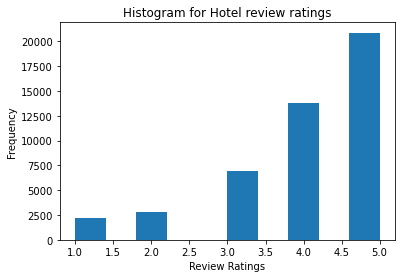

In [51]:
# PLotting Histogram for Review Ratings for the hotel
plt.hist(merge_df.reviewrating)
plt.xlabel('Review Ratings')
plt.ylabel('Frequency')
plt.title('Histogram for Hotel review ratings')

In [83]:
#merge_df[merge_df.location.str.contains('Vegas')]
df_vegas = merge_df[merge_df['location'].str.contains(pat='vegas', case=False) == True]

(array([ 39.,   0.,  26.,   0.,   0.,  80.,   0., 131.,   0., 255.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

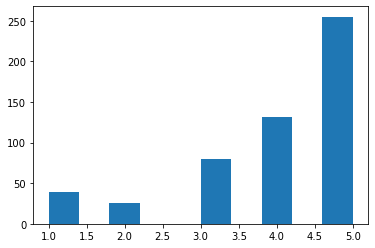

In [85]:
plt.hist(df_vegas.reviewrating)

<AxesSubplot:xlabel='reviewrating', ylabel='Count'>

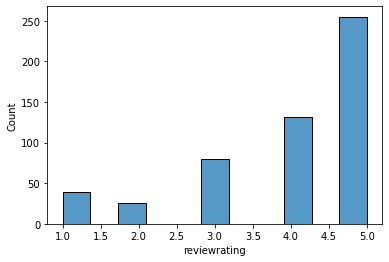

In [84]:
sns.histplot(x=df_vegas.reviewrating)

In [58]:
# ML Libraries
from textblob import TextBlob
import nltk

In [27]:
merge_df.columns

Index(['Unnamed: 0_x', 'gd', 'helpful_num', 'location', 'mgrRspnDummy',
       'mgr_res_date', 'mrtext', 'ratingDate', 'review_id', 'reviewrating',
       'reviewtext', 'reviewtitle', 'stay_month', 'stay_year',
       'travel_category', 'username', 'Unnamed: 0_y', 'ranking', 'rating_vol',
       'rdetails', 'lnglat', 'rsubrating', 'vtype', 'amenities', 'details',
       'v_name', 'rating_cat'],
      dtype='object')

In [32]:
print(merge_df.reviewrating.count())
print(merge_df.review_id.count())
print(merge_df.reviewtext.count())

46644
46644
46644


In [33]:
merge_df.reviewtext.head()

0    An excellent property! The rooms are very nice...
1    My first visit to Las Vegas and WOW!! Whilst a...
2    Some of the most beautiful hotel rooms in the ...
3    This Hotel is exceptional, its beautifully set...
4    My husband and I stayed here during a trip,to ...
Name: reviewtext, dtype: object

In [44]:
# Unique Hotels
# by gd
print(len(merge_df.gd.unique()))
# by name
print(len(merge_df.v_name.unique()))

34
34


In [48]:
# Unique travel category

merge_df.travel_category.unique()

array(['business', 'couple', 'friends', 'family', nan, 'solo'],
      dtype=object)

Text(0.5, 0, 'Review Ratings')

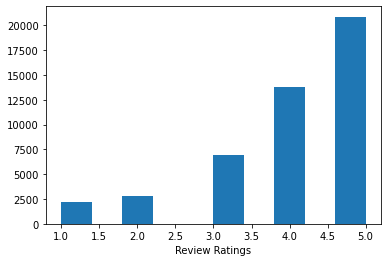

In [56]:
# Plotting Histogram of review ratings

plt.hist(merge_df.reviewrating)
plt.xlabel('Review Ratings')

<AxesSubplot:xlabel='reviewrating', ylabel='Count'>

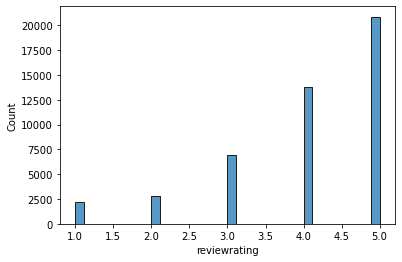

In [55]:
sns.histplot(data=merge_df, x='reviewrating')

## Sentiment 

Use `TextBlob` library to compute the polarity and subjectivity of every review.

1. Compare the histogram of review polarity with review ratings. How are they different? What might you conclude based on this difference about how people rate and how people write?
1. To what degree are polarity and subjectivity correlated with ratings?
1. Use a groupby + corr() statement to calculate the correlation between review ratings and polarity by travel category. In which categories are review polarity most and least correlated with ratings? Any explanation for this relationship?

In [61]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\durga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Helper Functions

In [ ]:
import spacy, time
from gensim.models.ldamulticore import LdaMulticore # this is the multi-core version
from gensim import corpora # import the corpora module
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from sklearn.model_selection import train_test_split


def line_doc(filename, encode = 'utf-8'):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    with open(filename, 'r', encoding = encode) as f:
        for txt in f:
            # yield returns next line
            yield txt.replace('\\n', '\n')
            # and get rid of any line breaks

# parsing to be done per sentence
def lemmatize(s, exclude):
    return [w.lemma_.lower() for w in s if (w.lemma_ not in exclude)&(~w.is_punct)]
# next will be a function that will pass a filename to the line_doc function
# and generate the parsed versions of ***EVERY SENTENCE***
# this function streams a file at filename and yields one parsed sentence at a time


def lemmatize_sentence_corpus(filename,nlp, batch_size, n_threads, sw=[], exclusions=[], encode = 'utf-8'):
    nlp.disable_pipes(["ner"]) # disable ner and tagger makes it a little faster
    # batch_size is the number of documents to parse in memory at a time
    # n_threads it the number of parallel (simultaneous processes to run)
    # n_threads is limited by the number of virtual cpu's on the system
    # the default free Colab system has only 2 virtual cores
    # most modern computers have at least 4
    exclude = set(sw + exclusions)
    for parsed_txt in nlp.pipe(line_doc(filename, encode = encode),batch_size=batch_size, n_threads=n_threads):
            for sent in parsed_txt.sents:
                yield ' '.join(lemmatize(sent, exclude))


def write_parsed_sentence_corpus(readfile, writefile, nlp, batch_size, n_threads, sw=[], exclusions =[], encode = 'utf-8'):
    streamingfile = lemmatize_sentence_corpus(readfile,nlp, batch_size, n_threads, sw=sw, exclusions=exclusions, encode = encode)
    with open(writefile, 'w', encoding = encode) as f:
        for sentence in streamingfile:
            if len(sentence)>0: # write sentence if includes non stopwords
                f.write(sentence+'\n')
    print('Success')


def phrase_detection(parsedfile, folderpath, passes = 2, returnmodels = True,threshold=10., encode = 'utf-8'):
    """
    parsedfile is the file location and name of the parsed sentence file
    folderpath is where the models and phrase detected texts need to be stored

    This function does phrase modeling. User specifies the number of passes.
    Each additional pass detects longer phrases. The maximum detectable phrase length for
    each pass, n, is 2^n.
    Returns the list of models by default. Also saves models and intermediary
    phrased sentences for each pass.
    """
    ngram = list()
    for it in range(passes):
        gen = LineSentence(parsedfile)
        gram=Phrases(gen, threshold = threshold)
        ngram.append(gram)
        modelpath = folderpath+'phrase_model_{}.phrasemodel'.format(it+1)
        textpath = folderpath+'sent_gram_{}.txt'.format(it+1)
        gram.save(modelpath)
        # Write sentence n-gram
        with open(textpath, 'w', encoding=encode) as f:
            for sent in gen:
                new_sent = ' '.join(gram[sent])
                f.write(new_sent + '\n')

    if returnmodels == True:
        return ngram


def phrase_prediction(rawfilepath, outpath,nlp, grams, sw =[], exclusions = [], batch_size = 500, n_threads = 2, encode = 'utf-8'):
    """
    rawfilepath is where the raw reviews (where 1 line = 1 review) are saved 
    outpath is where to save the resulting parsed and phrase modeled reviews
    nlp is the spacy parser object
    grams is a list of phrasemodels
    sw is a list of stopwords
    exclusions are additional words to exclude

    """
    with open(outpath, 'w', encoding = encode) as f:
        
        nlp.disable_pipes(["ner"]) # disable ner and tagger makes it a little faster
        exclude = set(sw + exclusions)
        
        for parsed_txt in nlp.pipe(line_doc(rawfilepath, encode = encode),batch_size=batch_size, n_threads=n_threads):
            doc = list()
            for sent in parsed_txt.sents:
                parsed = lemmatize(sent, exclude)
                for gram in grams: # loop through phrase models
                    parsed = gram[parsed] # apply phrase model transformation to sentence
                doc.append(' '.join(parsed).strip()) # append resulting phrase modeled sentence to list "doc"
            # write the transformed review as a single line in the new file
            txt_gram = ' '.join(doc).strip() # join all sentences in doc together as txt_gram
            f.write(txt_gram + '\n') # write the entire phrase modeled and parsed doc as one line in file

# 2. Topics in hotel reviews 

## Preprocessing the texts (3)

In this part, you will need to borrow the functions (attached):
1. Create a folder on your google drive to save your NLP files
1. Write a file containing raw reviews.
1. Lemmatize this file into a new file of sentences.
    1. remove stopwords
    1. remove punctuation
    1. Go grab a coffee while this runs. (takes ~10 mins)
1. Apply phrase model twice to identify phrases of up to 4 words in length.
1. Go back to the raw reviews and lemmatize + apply the phrase models at the review level, write the resulting review-level (1 line = 1 review) file to your NLP folder.
    1. Go grab a coffee while this runs. (takes ~10 mins)
1. Create a column in your dataframe called "parsed" that contains the resulting parsed versions of each reviews.
    1. Be sure to save this dataframe so you don't have to start from scratch (can read it in if you come back to the assignment). 
    1. If you come back to this part, make sure that you that you don't delete the outputs from previous session.
1. List the directory of your NLP folder to show that your intermediate steps have been saved.

## LDA model (3)

Apply the LDA model to the parsed reviews 

1. Create a dictionary
1. Filter extreme words in the dictionary
1. Create a corpus of reviews where 1 document = 1 review.
1. Run the LDA for 10-70 topics (inclusive of 70), skipping 10 at a time. (go grab a coffee, this takes ~ 15 minutes)

**How many topics is best in terms of perplexity?**

### Visualize the topics. 

1. Load the best model.
1. Create an LDAVis. (remember you have to `! pip install pyldavis` first)
1. **Pick 3 topics that kind of make sense and describe what they represent.**

### Use LDA to compare pos vs neg reviewers
Imagine you are the marketing director for one of these hotels (pick one of the resorts), **what are the differences in topics mentioned by satisfied and dissatisfied customers?** 